#### 统计及分布基础

In [1]:
import numpy as np
import random
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 1. 数据统计学主要概念

##### 众数：一组数据中出现次数最多的数，一组数据可以有多个众数，也可以没有众数。

In [2]:
### 加和值

x = np.array([1, 1, 1, 2, 4, 5, 6])

x_sum = sum(x)
x_agv = np.average(x)
x_me = np.mean(x)
x_mi = np.median(x)
x_std = np.std(x)
x_var = np.var(x)
print(f"加和值：{x_sum}, 平均值：{x_agv}, {x_me}, 中位数：{x_mi},  方差：{x_var}, 标准差：{x_std}")


加和值：20, 平均值：2.857142857142857, 2.857142857142857, 中位数：2.0,  方差：3.8367346938775504, 标准差：1.958758457257441


#### 1.1 方差 与标准差（标准偏差=方差的开放）



In [3]:
sum(np.arange(10))


45

In [4]:
from typing import List, Optional
import math


def cal_vars(X: list):
    """ 计算方差, 标准差 """
    m = sum(X)/len(X)
    varX = sum(map(lambda i: abs(i - m)**2, X))/len(X)
    stdX = math.sqrt(varX)
    
    return varX, stdX
    


### 手动计算
X = np.arange(10)
v, s = cal_vars(X)
print(f"方差1： {v}, 标准差1：{s}" )

### numpy 计算
varX = np.var(X)
stdX = np.std(X, ddof=0) ## 注意自由度ddof设置

print(f"方差2： {varX}, 标准差2：{stdX}" )

print(f"方差3： {varX}, 标准差3：{math.sqrt(varX)}" )

方差1： 8.25, 标准差1：2.8722813232690143
方差2： 8.25, 标准差2：2.8722813232690143
方差3： 8.25, 标准差3：2.8722813232690143



#### 1.2 协方差：
Cov(X, Y) = E[(X – E(X)(Y – E(Y)))]  = E[XY] – E[X]E[Y]

####
D(X+Y)=D(X)+D(Y)+2Cov(X，Y)
####
D(X-Y)=D(X)+D(Y)-2Cov(X，Y)



##### np.cov(x, y): 是把 x,y 纵向合在一起，每行为一个变量，每列为一个观测值 

方差：2.0，协方差：2.5
X协方差：2.0, Y协方差：8.0, XY协偏差： 4.0


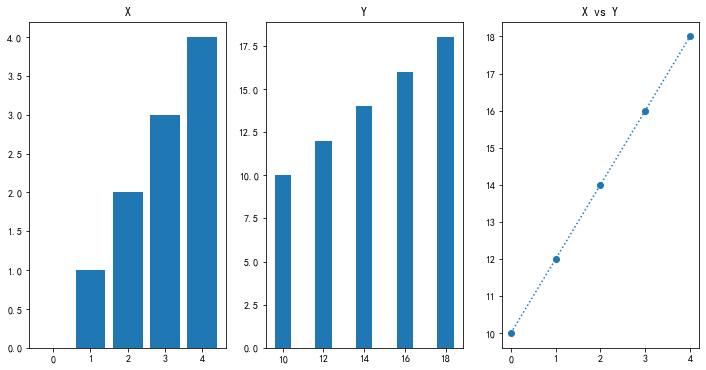

In [5]:
X = np.arange(5)
Y = np.array([10, 12, 14, 16, 18])

plt.figure(figsize=(12,6))
plt.subplot(131) ,plt.bar(X, X), plt.title("X")
plt.subplot(132) ,plt.bar(Y,Y), plt.title("Y")
plt.subplot(133) ,plt.plot(X,Y, 'o:'), plt.title("X vs Y")


covX = np.cov(X, ddof=0)
covY = np.cov(Y, ddof=0)
covXY = np.cov(X,Y, ddof=0) ## [[2,4],[4,8]], 2 x 协方差， 4：xy协方差，4：yx协方差，8：y协方差

print(f"方差：{np.var(X)}，协方差：{np.cov(X)}") #### numpy 默认自由度为1， 即为样本标准差
print(f"X协方差：{covX}, Y协方差：{covY}, XY协偏差： {covXY[0][1]}")


r = np.cov(X, ddof=0)/np.var(X)
r = covXY[0][1]/(np.std(X)*np.std(Y))


#### 1.3 皮尔逊相关性

In [6]:
tdf = pd.read_csv('../data/tips.csv')
tdf


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 理解
 
 ##### 1. 方差（标准差要开方）： 一组样本中，各个值 与中心点的距离的平均值。 ---- 》组内

 ##### 2. 协方差：各变量间的相关性， 协方差大于0位正相关，小于零负相关，等于零不相干， 相关性的大小为皮尔逊相关性

 

 点相乘结果：8.289388917629669, 皮尔逊相关性：1.0


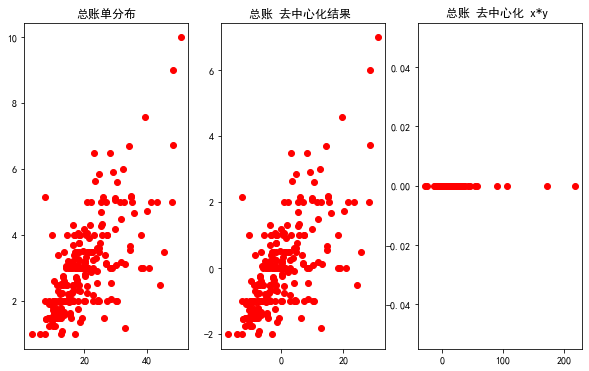

In [7]:
bill = tdf['total_bill'].values # 消费者就餐账单总额
tip = tdf['tip'].values # 消费者给服务员的小费


x_mean = list(map(lambda x: x - np.mean(bill), bill)) ### 去中心化
y_mean = list(map(lambda x: x - np.mean(tip), tip)) ### 去中心化
xy_mean = [x_mean[i] * y_mean[i] for i in range(len(x_mean))] ### 点坐标相乘


plt.figure(figsize=(10,6))
plt.subplot(131), plt.scatter(bill, tip, c='r'), plt.title("总账单分布")
plt.subplot(132), plt.scatter(x_mean, y_mean, c='r'), plt.title("总账 去中心化结果 ")
plt.subplot(133), plt.scatter(xy_mean, [0]*len(xy_mean), c='r'), plt.title("总账 去中心化 x*y ")

r = np.corrcoef(bill)
rr = np.mean(xy_mean) ### 大于零 说明X, Y为正相关（基于公式的理解）
print(f" 点相乘结果：{rr}, 皮尔逊相关性：{r}")

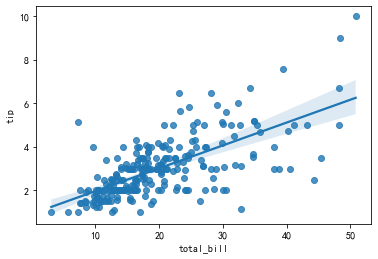

In [8]:
import seaborn as sns

sns.regplot(x='total_bill', y='tip', data=tdf)


#### 2. sns可视化

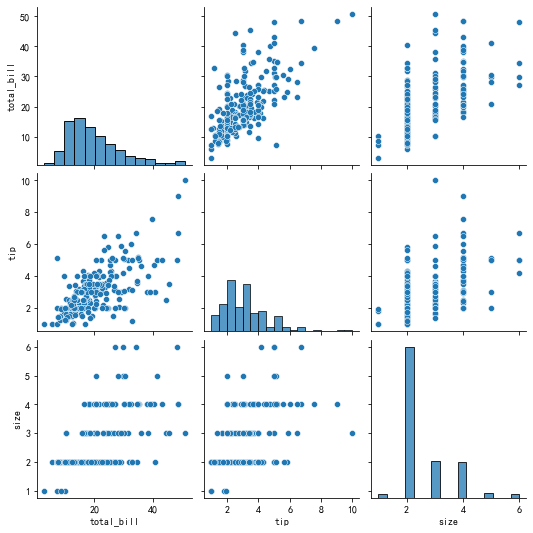

In [9]:
## 看图说话：这些图展现了数据集中消费总额、小费金额以及顾客数量三个特征（变量）之间的联系。
tdf = pd.read_csv('../data/tips.csv')

sns.pairplot(tdf)

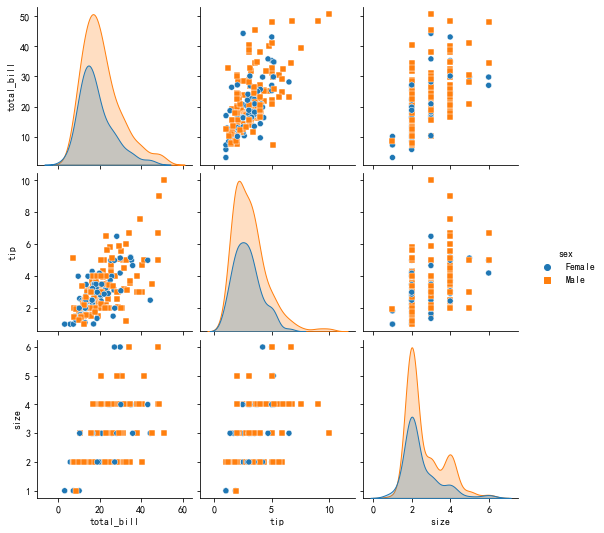

In [10]:
### #相关性图，和某一列的关系
sns.pairplot(tdf, hue='sex', markers=['o', 's'])

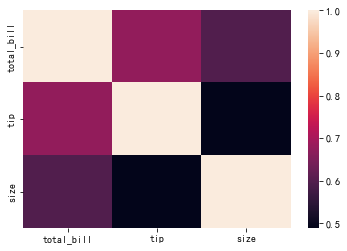

In [11]:
### 热力图， # 相关性热力图
## 看图说话：热力图可用来显示两变量之间的相关性，在这里两变量间对应的矩形框的颜色越浅，代表两者之间越具有相关性。
sns.heatmap(tdf.corr())


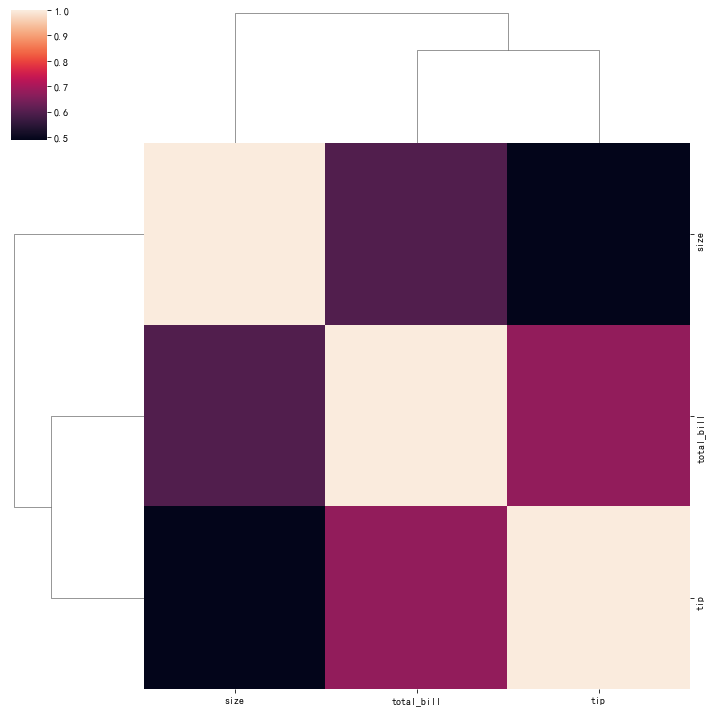

In [12]:
### # 分层相关性热力图

sns.clustermap(tdf.corr())

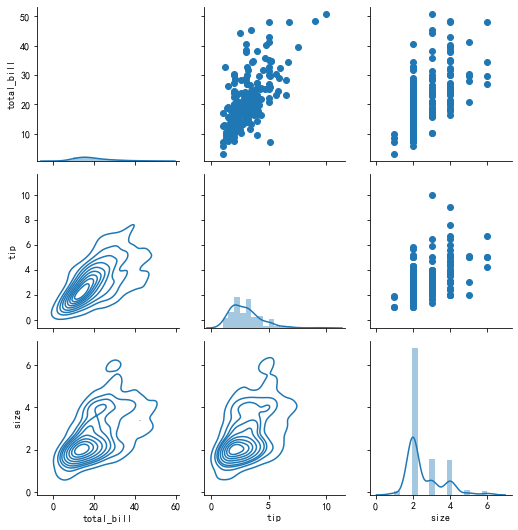

In [13]:
## 在pair grid图中，你可以根据自己需求，在这里呈现上述介绍的各种类型的图形
g = sns.PairGrid(tdf)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


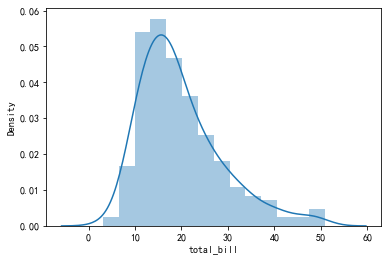

In [14]:
### 单个属性的分布
sns.distplot(tdf['total_bill'])


plt.show()

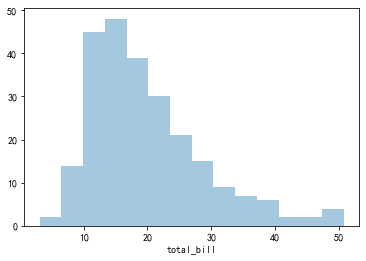

In [15]:
## dist plot图
## 上图显示，顾客在餐厅的消费总金额主要是在5-35的范围内分布的。
sns.distplot(tdf['total_bill'],kde = False)




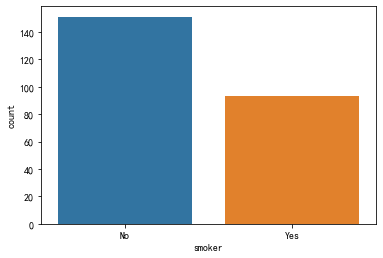

In [16]:
### 上图显示，来餐厅就餐的顾客，不抽烟者比会抽烟者多
sns.countplot(x = 'smoker', data = tdf)



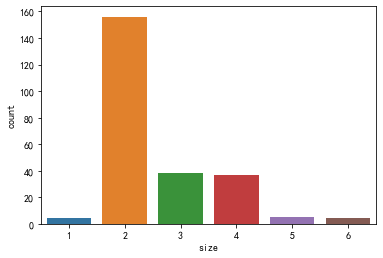

In [17]:
## 上图显示，2个人来餐厅就餐的总次数多一些。
sns.countplot(x = 'size',  data = tdf)



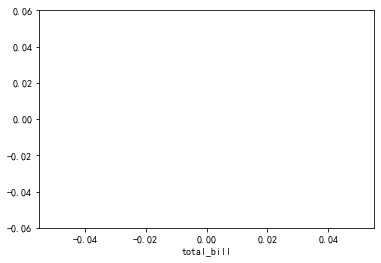

In [38]:
sns.rugplot(tdf['total_bill']) ## 上图呈现的是，顾客就餐消费总额在各个值上的边缘分布

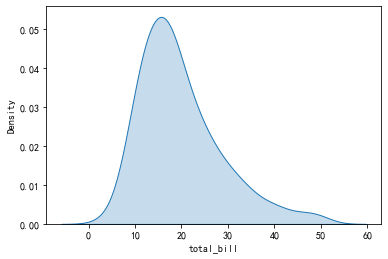

In [19]:
## KDE代表内核密度估计，它也显示了各个消费总金额数值的统计分布。

sns.kdeplot(tdf['total_bill'], shade=True)



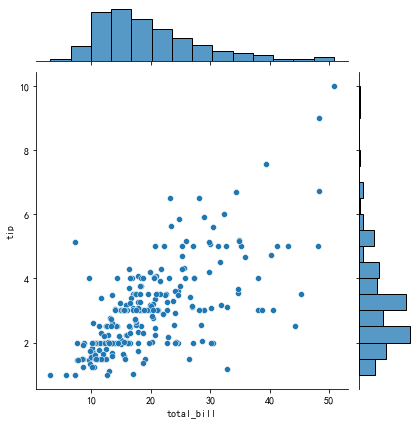

In [20]:
### 两两属性的相关性图
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf)
## 上图显示，顾客主要消费水平在10-30远之间，而此时，对应给侍者小费的钱在1-5元之间。

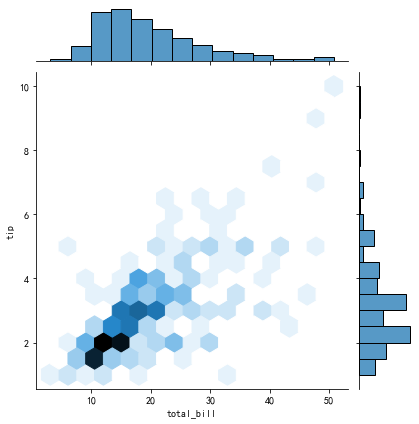

In [21]:
## 另一种清晰地可视化视图，颜色的深度代表频次。
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'hex')

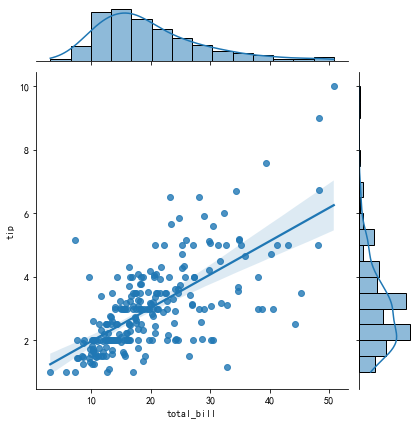

In [22]:
### 通过做一条简单的回归线，它表明了小费的金额是随着总账单金额的增加而增加的。
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'reg')


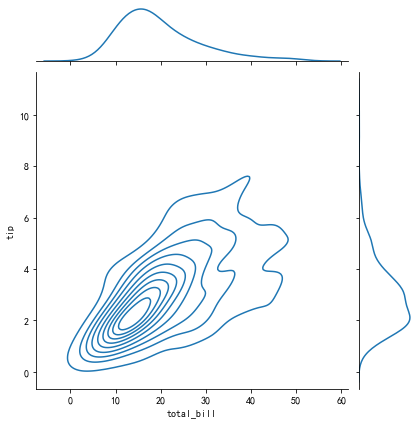

In [23]:

sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'kde')
## 可视化统计图：某个区域越暗，表明这个区域对应的频次越多。

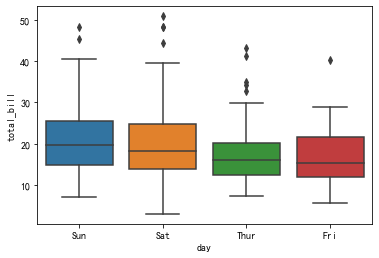

In [24]:
## box plot图: 上图显示大部分账单是在周六和周日支付的。
sns.boxplot(x = 'day', y= 'total_bill', data = tdf)

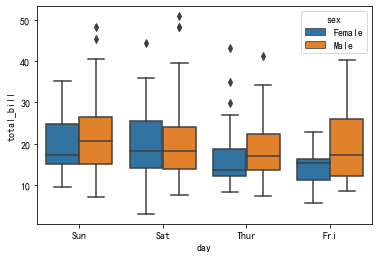

In [25]:
###  在上面的图表中你可以看到，在周六时，女性买单的次数会比男性多。（难道是因为买买买，男性付了好多钱，女性为了弥补男性的心里落差，然后请吃饭？哈哈
sns.boxplot(x = 'day', y= 'total_bill', data = tdf, hue = 'sex')


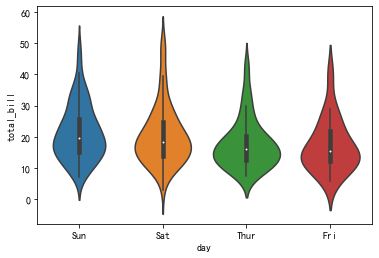

In [26]:
## violin plot: voilin plot和box plot很相似，但它结合了box plot图和密度痕迹。

sns.violinplot(x = 'day', y= 'total_bill', data = tdf)


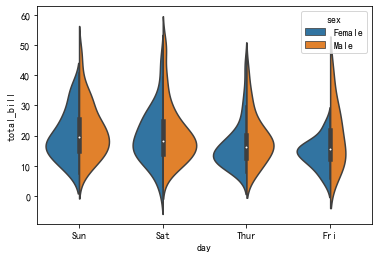

In [27]:
## 增加了性别的区分
sns.violinplot(x = 'day', y= 'total_bill', data = tdf, hue = 'sex', split = True)


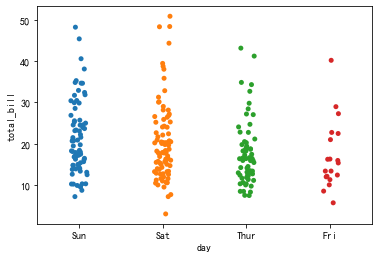

In [28]:
### strip plot图
## 这幅图呈现的是周四、周五、周六和周日这四天，顾客消费总额的散点图。

sns.stripplot(x = 'day', y = 'total_bill', data = tdf)


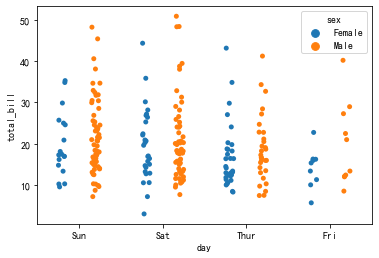

In [29]:
## 和上图一样，只不过对性别进行了区别。
sns.stripplot(x = 'day', y = 'total_bill', data = tdf, jitter= True,hue = 'sex', dodge = True)

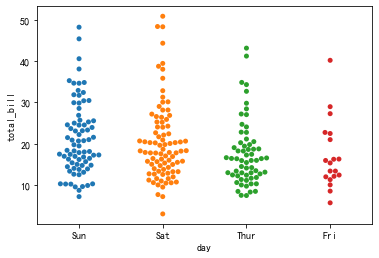

In [30]:
### swarm plot图
### Swarn plot和stripplot比较类似，但Swarn plot的不同之处在于它不会重叠数据点。

sns.swarmplot(x = 'day', y = 'total_bill', data = tdf)

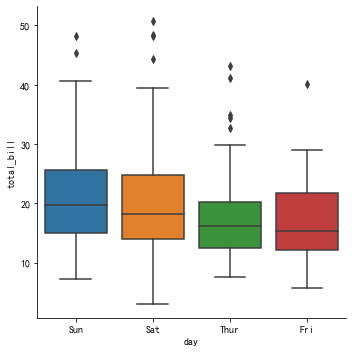

In [31]:
### factor plot图: 在factorplot图中，你可以给出任何你需要显示的图形。

sns.factorplot(x = 'day', y = 'total_bill', kind = 'box', data = tdf)


#### 3.分布

### 常见分布：
伯努利分布、二项分布、负二项分布、几何分布、超几何分布、泊松分布、正态分布（也称高斯分布）、均匀分布、指数分布、β分布（贝塔分布）、Γ分布（伽马分布）、极值分布

###
https://blog.csdn.net/wang136958280/article/details/116094979

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats


##### 3.1 努伯利分布 （0-1分布或是两点分布）：
##### 期望：E(x) = P
##### 方差：D（x）= p(1-p)

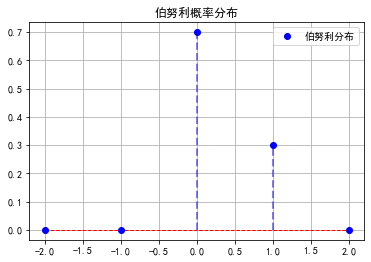

In [86]:
def bernoulli_distribution(p = 0.3, x = np.arange(-2,3)):
    """ 伯努利分布"""
    
    bernoulli = stats.bernoulli.pmf(x, p)
    
    plt.plot(x, bernoulli, 'bo', label='伯努利分布', lw=5)
    plt.vlines(x, 0, bernoulli, colors='b', lw=2, alpha=0.5, linestyles='dashed')
    plt.hlines(y=0, xmin=min(x), xmax=max(x), colors='r', linestyles='dashed', lw=1)
    plt.title('伯努利概率分布')
    plt.legend()
    plt.grid(True)
    plt.show()
    

bernoulli_distribution()

#### 3.2 二项分布

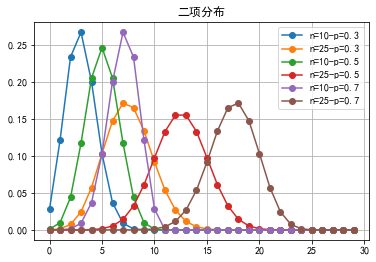

In [84]:

def binomial_distribution():
    """ 绘制二项分布概率密度 """
    """ 目的： 尝试不同发生概率p 和 不同奴伯利试验次数下的 离散概率分布"""
    
    ps = [0.3, 0.5, 0.7]
    for p in ps:
        for n in range(10, 30, 15):
            k = np.arange(30) 
            binomial = stats.binom.pmf(k, n, p) ## 计算 P(X=k)
            plt.plot(k, binomial, 'o-', label=f"n={n}-p={p}")
            plt.legend()
    
    plt.title("二项分布")
    plt.grid(True)
    plt.show()

binomial_distribution()


##### 3.3 几何分布: 几何分布是指重复进行成功率为p pp伯努利试验，进行到第k kk次试验才首次成功。



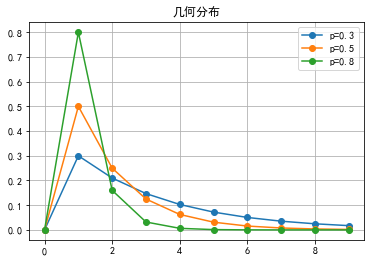

In [87]:
def gem_distrbution():
    """几何分布 """
    p1=0.3
    p2=0.5
    p3=0.8
    n = np.arange(0,10)
    geometric1=stats.geom.pmf(n,p1)
    geometric2=stats.geom.pmf(n,p2)
    geometric3=stats.geom.pmf(n,p3)
    plt.plot(n, geometric1, 'o-',label='p=0.3')#画图
    plt.plot(n, geometric2, 'o-',label='p=0.5')
    plt.plot(n, geometric3, 'o-',label='p=0.8')
    plt.legend() #显示图例
    plt.grid(True) #显示网格线
    plt.title('几何分布')
    plt.show()

gem_distrbution()

### 3.4 超几何分布

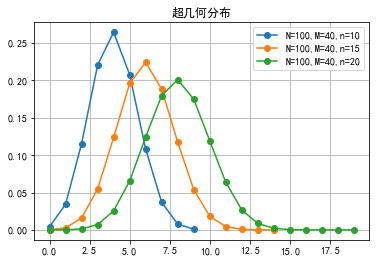

In [88]:
def hypergeom_ditrubtion():
    """ 超几何分布 """
    N=100 #物品总数
    M=40 #具有某种属性物品的总数
    for n in range(10,25,5):#用for循环确定抽取的次数
        k = np.arange(0,n) #抽取n次，抽到具有该属性物品的个数k
        hypergeom=stats.hypergeom.pmf(k,N,M,n)
        plt.plot(k, hypergeom, 'o-',label='N=100,M=40,n=%i'%n)#画图

    plt.legend() #显示图例
    plt.grid(True) #显示网格线
    plt.title("超几何分布")
    plt.show()

hypergeom_ditrubtion()

##### 3.5 泊松分布 -- 小概率事件

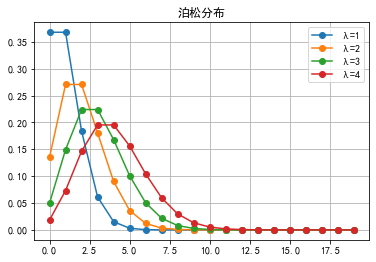

In [90]:
def poisson_distrbution():
    """ 泊松分布 """
    for i in range(1, 5): ## 泊松分布的参数λ
        n = np.arange(0,20) # k 取值
        poisson=stats.poisson.pmf(n, i)
        plt.plot(n, poisson, 'o-',label='λ=%i'%i)
    
    plt.legend()
    plt.grid(True)
    plt.title("泊松分布")


poisson_distrbution()

##### 以上都是离散型随机变量的分布， 下面为 连续型随机变量的分布

,概率,累计概率
0,0.003066,0.003066
1,0.036089,0.039155
2,0.100819,0.139974
3,0.156293,0.296267
4,0.175467,0.471735
5,0.160623,0.632358
6,0.127717,0.760075
7,0.091604,0.851678
8,0.060727,0.912405
9,0.037833,0.950238


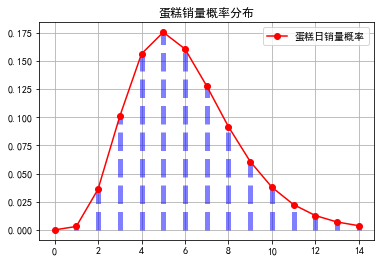

In [150]:

df = pd.DataFrame({"日期":[1,2,3,4,5,6,7], "蛋糕销量": [3,5,7,4,6,8,2] })

# plt.plot(df['日期'], df['蛋糕销量'], 'bo-',  lw=1)
# plt.hlines(y= np.mean(df['蛋糕销量']), xmin=1, xmax=5, colors='r', linestyles='dashed', lw=1)
# plt.title("某款蛋糕周销量")
# plt.grid(True)

n = np.mean(df['蛋糕销量'])


x = np.arange(15)
poisson=stats.poisson.pmf(n, x)
sum_poisson = []

cp = poisson[0]
for p in poisson[1:]:
    cp+=p
    sum_poisson.append(cp)
    

plt.plot(x[1:], sum_poisson, 'bo-', label='蛋糕日销量累计概率')
plt.plot(x, poisson, 'ro-', label='蛋糕日销量概率')
plt.vlines(x, 0, poisson, colors='b', lw=5, alpha=0.5, linestyles='dashed')
plt.legend()
plt.grid(True)
plt.title("蛋糕销量概率分布")

pd.DataFrame({"概率": poisson[1:], "累计概率":sum_poisson})

##### 3.5 正态分布（Normal Distribution）：正态分布又称高斯分布

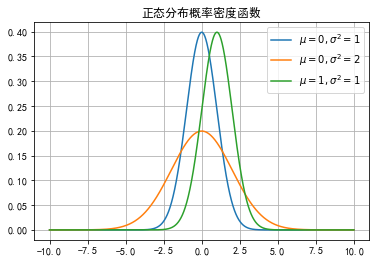

In [151]:
def normal_distribution():
    """ 正态分布 """
    x=np.linspace(-10,10,100000)
    y1=stats.norm.pdf(x,0,1)
    y2=stats.norm.pdf(x,0,2)
    y3=stats.norm.pdf(x,1,1)
    y4=stats.norm.pdf(x,1,2)
    y5=stats.norm.pdf(x,3,1)
    y6=stats.norm.pdf(x,5,3)
    plt.plot(x, y1,label='$\mu=0,\sigma^2=1$')
    plt.plot(x, y2,label='$\mu=0,\sigma^2=2$')
    plt.plot(x, y3,label='$\mu=1,\sigma^2=1$')

    plt.legend() #显示图例
    plt.title('正态分布概率密度函数') #图名
    plt.grid(True) #显示网格线
    plt.show()

normal_distribution()

In [158]:
tdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


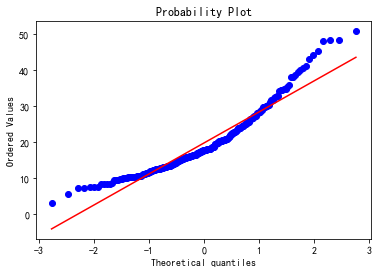

In [166]:
## Q-Q图， 判断是否符合正态分布

tdf.sort_values(by='total_bill', inplace=True)

stats.probplot(tdf['total_bill'], dist='norm', plot=plt)
plt.show()


### 4. 抽样检验：
#### 4.1 卡方分布

No handles with labels found to put in legend.


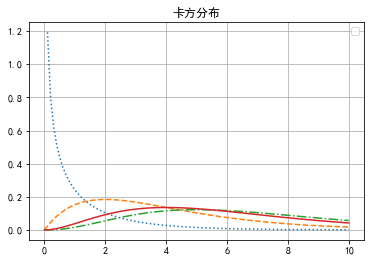

In [172]:
### 卡方分布

def chi_ditribution():
    x = np.linspace(0, 10, 100)
    fig,ax = plt.subplots(1,1)
    
    linestyles = [':', '--', '-.', '-']
    deg_of_freedom = [1, 4, 7, 6]
    for df, ls in zip(deg_of_freedom, linestyles):
        ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)
    
    plt.title('卡方分布')
    plt.grid(True)
    plt.legend()

chi_ditribution()

卡方值=138.2050, p值=0.0000, 自由度=4 expected_frep=[[ 36.96  14.     5.04]
 [132.    50.    18.  ]
 [161.04  61.    21.96]]


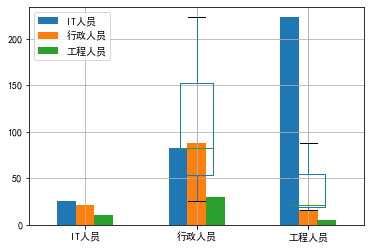

In [186]:
#### 卡方检验 -- 独立性（显著性）

from  scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

data=[[25,21,10],[82,88,30],[223,16,5]]
indexes = ['美式', '拿铁', '卡布']
names = ['IT人员', '行政人员', '工程人员']
df=pd.DataFrame(data, index= indexes, columns= names )

def cal_chi2(df):
    """ 卡方检验 """
    kt =chi2_contingency(df)
    print('卡方值=%.4f, p值=%.4f, 自由度=%i expected_frep=%s'%kt)
    
    return kt
df.plot(kind='bar')

cal_chi2(df)

df.boxplot()


(126.08080808080808,
 2.9521414005078985e-29,
 1,
 array([[55., 45.],
        [55., 45.]]))

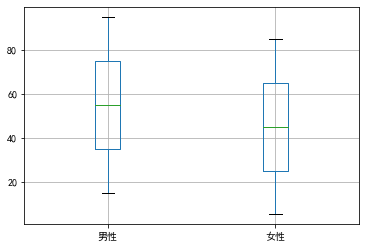

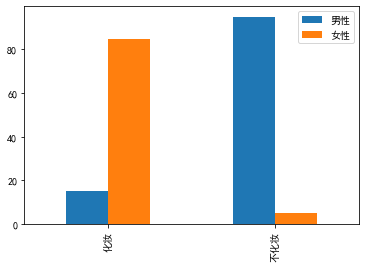

In [189]:
#### 例子2：卡方检验-- 独立性（显著性）

data = [[15, 85], [95, 5]]

df = pd.DataFrame(data, index=['化妆', '不化妆'], columns=['男性', '女性'])
df

df.boxplot()
df.plot(kind='bar')
chi2_contingency(df)## 性别与化妆存在显著差异

##### 一个班级60人，针对文理分科的投票上，39人赞成，21人反对，请问：对分科意见是否有显著性差异？

In [190]:
from scipy.stats import chisquare ### 拟合检验

chisquare([39, 21])



Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

#### 4.2 t-分布

##### 在概率论和统计学中，t-分布（t-distribution）用于根据小样本来估计呈正态分布且方差未知的总体的均值。如果总体方差已知（例如在样本数量足够多时），则应该用正态分布来估计总体均值，记为：X1∼N(0,1),X2∼χ2(n)

##### t检定改进了Z检定（en:Z-test），不论样本数量大或小皆可应用。在样本数量大（超过120等）时，可以应用Z检定，但Z检定用在小的样本会产生很大的误差，因此样本很小的情况下得改用学生t检定。

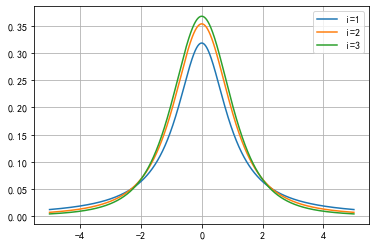

In [195]:

def t_distribution():
    """ t-分布 """
    x = np.linspace(-5,5,100000)
    for i in range(1, 4,1):
        y_t = stats.t.pdf(x, i)
        plt.plot(x,y_t, label=f"i={i}")
        plt.legend()
    plt.grid(True)
    
t_distribution()


Ttest_1sampResult(statistic=-3.001649525885985, pvalue=0.014916414248897527)

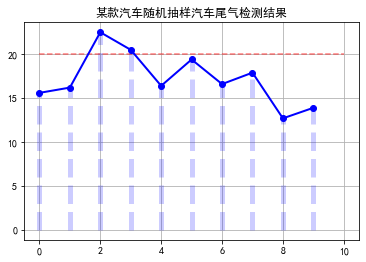

In [219]:
### 单样本t-检测

from scipy import stats

## 例子1： 随机抽样产生的某汽车厂生产汽车的排放标准数，那么这个汽车厂生产的汽车排放标准是不是超过了20？(是否显著大于20)
a = 20
x = [15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9] ## 随机抽取的某厂某款汽车的尾气检测数据

plt.plot(np.arange(len(x)), x, 'bo-', lw=2)
plt.vlines(np.arange(len(x)), 0, x, colors='b', lw=5, alpha=0.2, linestyles='dashed')
plt.hlines(20, xmin=0, xmax=len(x), linestyles='dashed', colors='r', alpha=0.5 )
plt.title("某款汽车随机抽样汽车尾气检测结果")
plt.grid(True)

t,p_towTail = stats.ttest_1samp(x, popmean= a ) ## pvalue=0.014916414248897527 < 0.05, 和20 有差异（！= 20）

p_one = p_towTail/2

""""
左尾判断条件：t < 0 and p_one < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and p_one < 判断标准（显著水平）alpha
p值：假定原假设成立的前提下，得到样本平均值的概率是多少。p值越小，则拒绝原假设

根据左尾检验判断，拒绝原假设，也就是汽车的引擎排放满足标准。
"""


Text(0.5, 1.0, '汽车尾气数据分布')

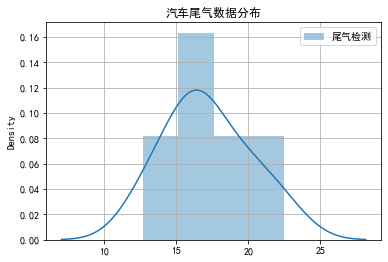

In [294]:
### 正态分布检查
# plt.hist(x, bins=4)
sns.distplot(x, label='尾气检测')
plt.grid(True)
plt.legend()
plt.title("汽车尾气数据分布")

In [286]:
#### 单样本t-检验 例子2：

''''
以往通过大规模调查已知某地新生儿的平均出生体重为3.30kg。从该地难产儿中随机抽取35名新生儿作为研究样本，
平均出生体重为3.42kg，标准差为0.40kg，问该地难产儿出生体重与一般新生儿体重有无差异? 

'''

s_mean = 3.30 ## 样本1： 整体样本平均新生儿体重；
q_mean = 3.42 ## 样本2：35例 平均体重
q_std = 0.40 ## 样本2：标准差

## 生成均值为3.42，标准差为0.40的符合正态分布的样本
samp = stats.norm.rvs(loc=3.30, scale=0.40, size=35)
print(f"samp's type is {type(samp)}, size = {len(samp)}, mean = {samp.mean()}, std = {samp.std()}")

t, p_towTail = stats.ttest_1samp(samp, 3.42)
print(f"t = {t}, p = {p_towTail}")
# t = -1.265510

samp's type is <class 'numpy.ndarray'>, size = 35, mean = 3.368775092159822, std = 0.34706914701429775
t = -0.8606065275564743, p = 0.39548317747704564


t = 3.7398870259524446, p = 0.0032668229904865296


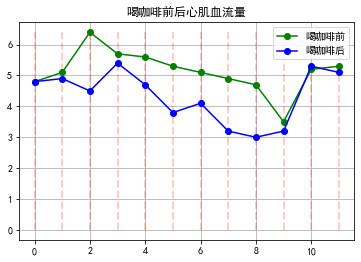

In [287]:
#### 配对样本 t-检验: 

##### 某项研究评估咖啡因对运动者的心肌血流量的影响，先后测定了12名男性志愿者饮用咖啡前后运动状态下的心肌血流量。问饮用前后运动者的心肌血流量有无差异


before = np.array([4.8, 5.1, 6.4, 5.7, 5.6, 5.3, 5.1, 4.9, 4.7, 3.5, 5.2, 5.3])
after = np.array([4.8, 4.9, 4.5, 5.4, 4.7, 3.8, 4.1, 3.2, 3.0, 3.2, 5.3, 5.1])

df = pd.DataFrame({"喝咖啡前": before, "喝咖啡后":after})

plt.title("喝咖啡前后心肌血流量")
plt.plot(np.arange(len(before)), before, 'go-', label='喝咖啡前')
plt.plot(np.arange(len(before)), after, 'bo-', label='喝咖啡后')
plt.vlines(np.arange(len(before)), ymin=0, ymax=max(before), linestyles='dashed', colors='r', alpha=0.2 ,lw=2)
plt.legend()
plt.grid(True)

t, p_towTail = stats.ttest_rel(before, after)
print(f"t = {t}, p = {p_towTail}")
# t = 3.7398870259524446, p = 0.0032668229904865296

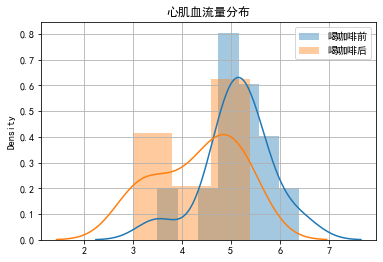

In [292]:
### 正态检查

sns.distplot(before, label='喝咖啡前')
sns.distplot(after, label='喝咖啡后')
plt.title('心肌血流量分布')
plt.legend()
plt.grid(True)

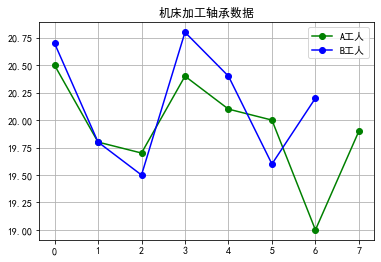

In [297]:
#### 
"""
甲、乙两台机床分别加工某种轴承, 轴承的直径分别服从正态分布, 从各自加工的轴承中分别抽取若干个轴承测其直径。
"""

x = [20.5, 19.8, 19.7, 20.4, 20.1, 20.0, 19.0, 19.9]
y = [20.7, 19.8, 19.5, 20.8, 20.4, 19.6, 20.2]
# 方差齐性检验


plt.title("机床加工轴承数据")
plt.plot(np.arange(len(x)), x, 'go-', label='A工人')
plt.plot(np.arange(len(y)), y, 'bo-', label='B工人')
plt.legend()
plt.grid(True)

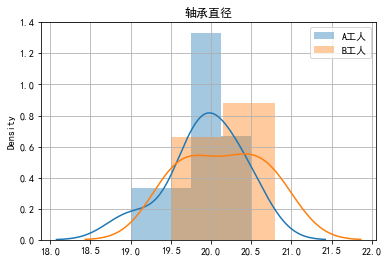

In [298]:
sns.distplot(x, label='A工人')
sns.distplot(y, label='B工人')
plt.title('轴承直径')
plt.legend()
plt.grid(True)

In [299]:
### 独立t-检验分布

# 方差齐性检验
print(stats.levene(x,y))

# 独立样本T检验,默认方差齐性
print(stats.ttest_ind(x, y))
# 如果方差不齐性，则equal_var=False
print(stats.ttest_ind(x,y,equal_var=False))


LeveneResult(statistic=0.49616519174040724, pvalue=0.49361609677338825)
Ttest_indResult(statistic=-0.8548480353442837, pvalue=0.40811369790462515)
Ttest_indResult(statistic=-0.847794807907232, pvalue=0.41289345139846967)


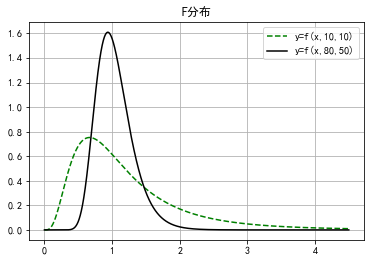

In [303]:
#### F分布

def f_distribution():
    """ F 分布概率  """
    
    x = np.linspace(0,4.5, 10000)
    fd1 = stats.f.pdf(x,10,10)
    fd2 = stats.f.pdf(x,80,50)
    
    plt.plot(x, fd1, 'g--',label='y=f(x,10,10)')
    plt.plot(x, fd2, 'k-',label='y=f(x,80,50)')
    plt.legend()
    plt.title("F分布")
    plt.grid(True)

f_distribution()

t检验结果：p值
Ttest_relResult(statistic=-1.0949585748508637, pvalue=0.31553039502230523)
F检验结果：p值
0.9269779255671015


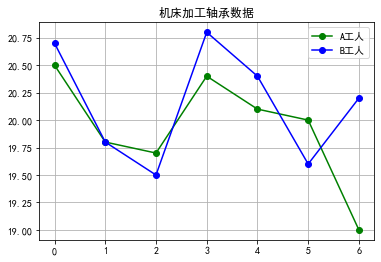

In [309]:
"""
甲、乙两台机床分别加工某种轴承, 轴承的直径分别服从正态分布, 从各自加工的轴承中分别抽取若干个轴承测其直径。
"""

x = [20.5, 19.8, 19.7, 20.4, 20.1, 20.0, 19.0]
y = [20.7, 19.8, 19.5, 20.8, 20.4, 19.6, 20.2]

print('t检验结果：p值')
print(stats.ttest_rel(x, y))

# 计算组内样本方差
var1 = np.var(x, ddof=1)
var2 = np.var(y, ddof=1)

F = var1 / var2
# 计算自由度
df1 = len(x) - 1
df2 = len(y) - 1

p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
print('F检验结果：p值')
print(p_value)

plt.title("机床加工轴承数据")
plt.plot(np.arange(len(x)), x, 'go-', label='A工人')
plt.plot(np.arange(len(y)), y, 'bo-', label='B工人')
plt.legend()
plt.grid(True)

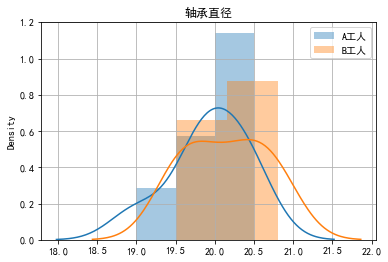

In [310]:
sns.distplot(x, label='A工人')
sns.distplot(y, label='B工人')
plt.title('轴承直径')
plt.legend()
plt.grid(True)

In [313]:
#### 多因数交互分析 -- F-检验 + 互信息

#### 3.6 均匀分布

In [37]:
#### 3.6 均匀分布

#### 3.7 指数分布